In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# load the dataset

dataset = pd.read_csv('decision_tree_dataset.csv')
dataset.head(3)

,Age,Income,Student,Credit_rating,Buy
0,Middle_Aged,Medium,No,Fair,Yes
1,Youth,High,No,Excellent,No
2,Middle_Aged,Medium,No,Excellent,Yes


In [19]:
# check the null value
dataset.isnull().sum()

Age              0
Income           0
Student          0
Credit_rating    0
Buy              0
dtype: int64

## Encoding Data using Label Encoder

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
# now encode the dataset

encoding_map = {}  # dictionary to store mappings


for col in dataset.columns:
    dataset[col] = le.fit_transform(dataset[col])
    encoding_map[col] = dict(zip(le.classes_, le.transform(le.classes_)))


In [22]:
# Display the mappings
for col, mapping in encoding_map.items():
    print(f"\nEncoding for '{col}':")
    for k, v in mapping.items():
        print(f"  {k} ➝ {v}")


Encoding for 'Age':
  Middle_Aged ➝ 0
  Senior ➝ 1
  Youth ➝ 2

Encoding for 'Income':
  High ➝ 0
  Low ➝ 1
  Medium ➝ 2

Encoding for 'Student':
  No ➝ 0
  Yes ➝ 1

Encoding for 'Credit_rating':
  Excellent ➝ 0
  Fair ➝ 1

Encoding for 'Buy':
  No ➝ 0
  Yes ➝ 1


In [23]:
dataset.head(5)

,Age,Income,Student,Credit_rating,Buy
0,0,2,0,1,1
1,2,0,0,0,0
2,0,2,0,0,1
3,0,2,0,0,1
4,0,0,0,0,1


## Input and Output variable selection

In [24]:
x = dataset.iloc[:,:-1]
y = dataset['Buy']

## Train Test and Split

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Preparation and Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [31]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
# check the accuracy 
dt.score(x_test, y_test)

0.8363636363636363

In [ ]:
# check the accuracy of train

dt.score(x_train, y_train)

# if there is huge different between bot train and test score it mean your model is over fitted, then you need to do the Pruning.

0.8795454545454545

Before prediction convert your values to:

Encoding for 'Age':
  Middle_Aged ➝ 0
  Senior ➝ 1
  Youth ➝ 2

Encoding for 'Income':
  High ➝ 0
  Low ➝ 1
  Medium ➝ 2

Encoding for 'Student':
  No ➝ 0
  Yes ➝ 1

Encoding for 'Credit_rating':
  Excellent ➝ 0
  Fair ➝ 1

Encoding for 'Buy':
  No ➝ 0
  Yes ➝ 1

In [37]:
# now predict the data --> Youth,High,No,Excellent,No

dt.predict([[2,0,0,0]])

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

## Plot the Tree

In [38]:
from sklearn.tree import plot_tree

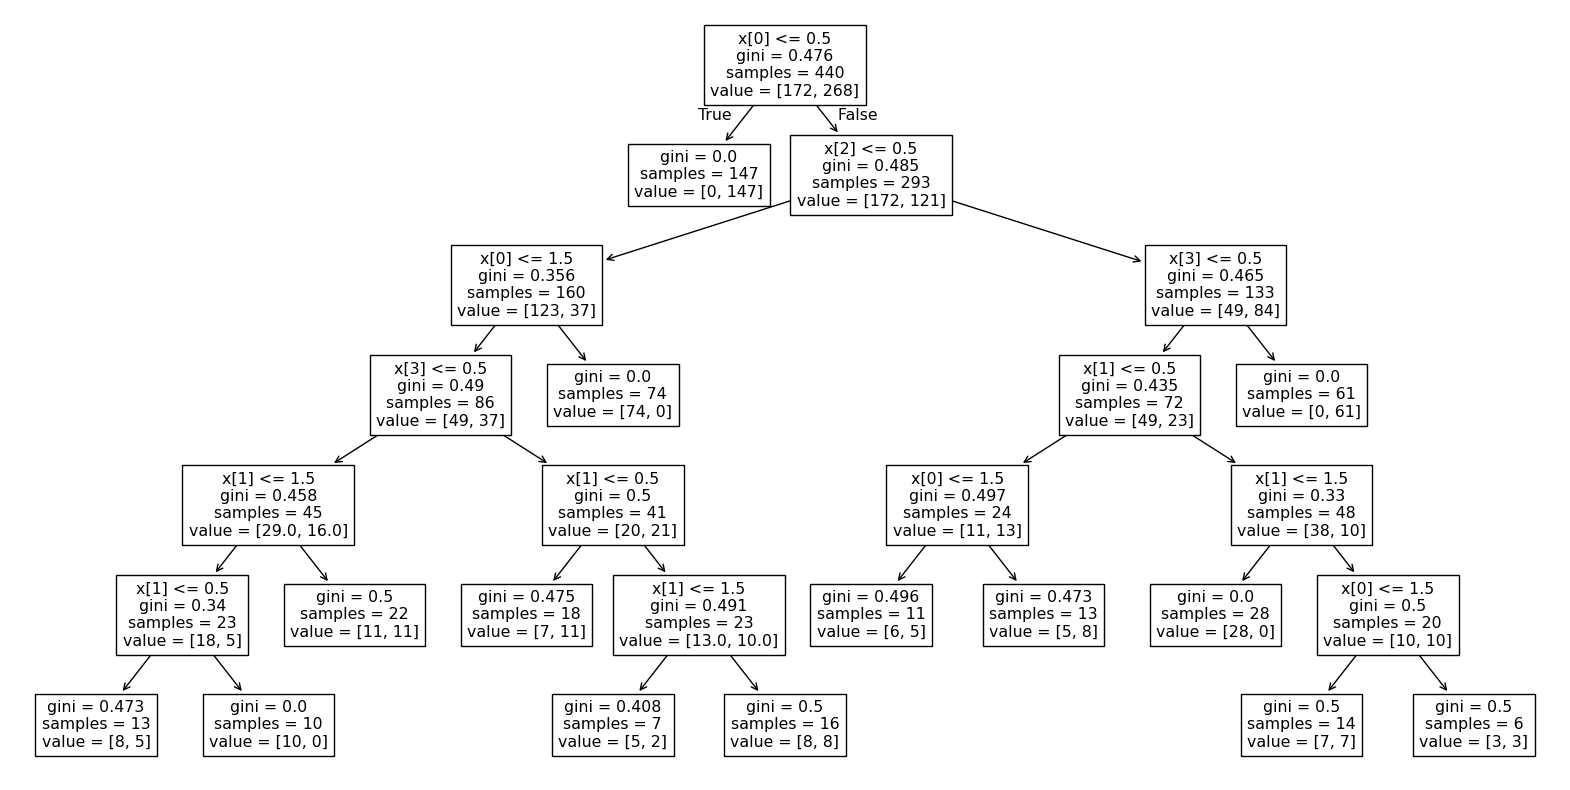

In [40]:
# plot the tree

plt.figure(figsize=(20, 10))
plot_tree(dt)
plt.show()

## Now use Entropy to train the Tree

In [41]:
dt1 = DecisionTreeClassifier(criterion="entropy")

dt1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt1.score(x_test, y_test) # accuracy looks like same as gini

0.8363636363636363

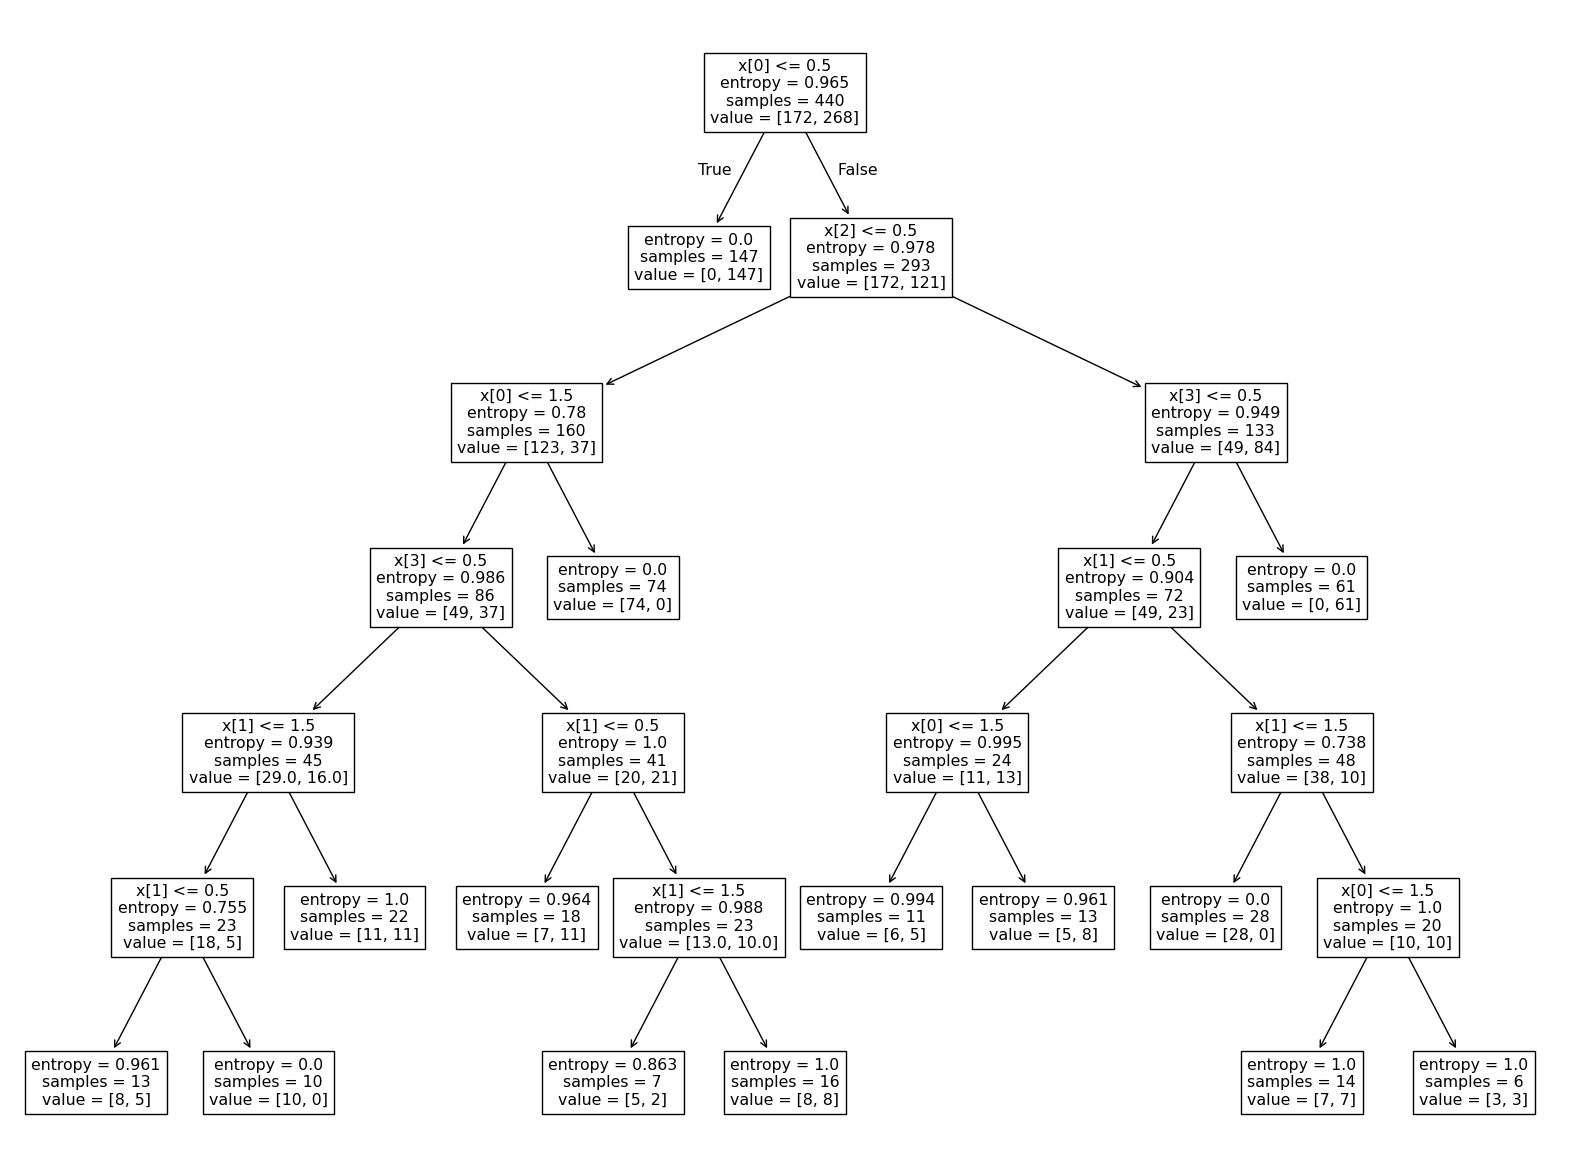

In [43]:
# plt the graph

plt.figure(figsize=(20,15))
plot_tree(dt1)
plt.show()